In [22]:
from matplotlib import pyplot
from keras.datasets import cifar10

In [19]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# load dataset


In [20]:
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

# summarize loaded dataset


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


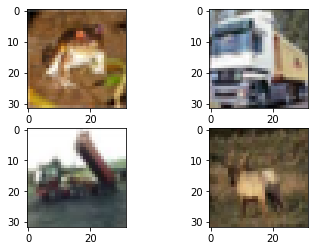

In [21]:
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot some images
for i in range(4):
	pyplot.subplot(220 + 1 + i)
	pyplot.imshow(train_X[i])
pyplot.show()

In [23]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [24]:
# one hot y values
train_Y = to_categorical(train_y)
test_Y = to_categorical(test_y)